In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def timeTakenToReachTarget(threshold, targetCount):
    i = 0
    atTargetCount = 0

    while atTargetCount < targetCount:
        if abs(actualPos[i] - targetPos[i]) < threshold: 
            atTargetCount += 1
        i += 1

    return timestamps[i]

In [23]:
meanUp = []
stdUp = []
meanDown = []
stdDown = []


for direction in ['u', 'd']:
    for distance in ['100', '200', '300', '400', '500']:
        results = []
        for testNum in range(1, 6):
        # Read the data from the CSV file
            try:
                df = pd.read_csv(distance + direction + '_' + str(testNum) + '.csv')
            except Exception as e:
                print(e)
                print(distance, direction, testNum)
            timestamps = df['timestamp']
            actualPos = df['actual']
            targetPos = df['target']
            time = timeTakenToReachTarget(3, 20)
            results.append(time)
        # Append means and std to results arrays
        if direction == 'u':
            meanUp.append(np.array(results).mean())
            stdUp.append(np.array(results).std())
        elif direction == 'd':
            meanDown.append(np.array(results).mean())
            stdDown.append(np.array(results).std())
        # print(distance, direction, ':', np.array(results).mean(), np.array(results).std())
        

[Errno 2] No such file or directory: '200d_5.csv'
200 d 5


[1.6525527954101562, 2.5304493427276613, 4.097049808502197, 3.372715187072754, 3.4420522689819335]


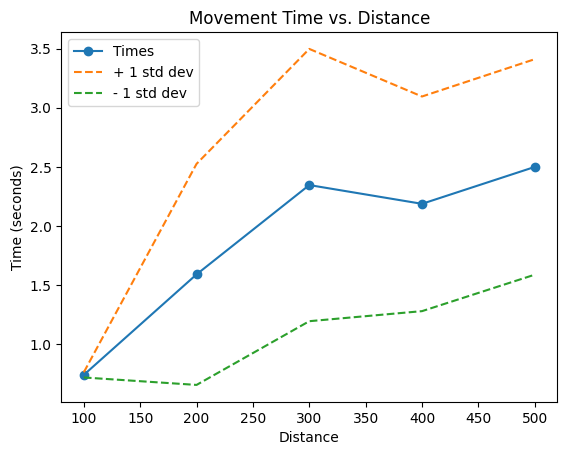

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Distances (replace with your actual distances)
distances = [100, 200, 300, 400, 500]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the times vs. distances
ax.plot(distances, meanUp, marker='o', label='Times')

# Plot the standard deviations as lines
ax.plot(distances, [t + std for t, std in zip(meanUp, stdUp)], '--', label='+ 1 std dev')
ax.plot(distances, [t - std for t, std in zip(meanUp, stdUp)], '--', label='- 1 std dev')

# Set labels and title
ax.set_xlabel('Distance')
ax.set_ylabel('Time (seconds)')
ax.set_title('Movement Time vs. Distance')

# Add legend
ax.legend()

# Show the plot
plt.show()